In [1]:
#PACOTES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTAÇÃO DO BANCO DE DADOS

frauds=pd.read_csv('D:/Acadêmico/Docência/FUCAPE/Soluções em Ciências de Dados/Dados1 Cartoes.csv')

ANÁLISE DO BANCO DE DADOS

In [3]:
#Variáveis:

#distance_from_home - A distância de casa onde a transação ocorreu.
#distance_from_last_transaction - A distância da última transação.
#ratio_to_median_purchase_price - Razão do preço de compra da transação para o preço médio de compra.
#repeat_retailer - Se a transação ocorreu com o mesmo varejista. [0,1]
#used_chip - Se a transação foi realizada através de chip (cartão de crédito). [0,1]
#used_pin_number - Se a transação foi realizada usando número PIN. [0,1]
#online_order - Se a transação é um pedido online. [0,1]
#fraud - Se a transação é fraudulenta. [0,1]


In [4]:
frauds

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
frauds.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
frauds.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [7]:
frauds.shape

(1000000, 8)

In [8]:
frauds.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [9]:
frauds.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [10]:
frauds.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [11]:
frauds.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
frauds.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
print(frauds['fraud'].value_counts())
print(frauds['fraud'].value_counts(normalize=True))

print('-----------------------------------------')
print(frauds['repeat_retailer'].value_counts())
print(frauds['repeat_retailer'].value_counts(normalize=True))

print('-----------------------------------------')
print(frauds['used_chip'].value_counts())
print(frauds['used_chip'].value_counts(normalize=True))

print('-----------------------------------------')
print(frauds['used_pin_number'].value_counts())
print(frauds['used_pin_number'].value_counts(normalize=True))

print('-----------------------------------------')
print(frauds['online_order'].value_counts())
print(frauds['online_order'].value_counts(normalize=True))

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64
-----------------------------------------
repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64
repeat_retailer
1.0    0.881536
0.0    0.118464
Name: proportion, dtype: float64
-----------------------------------------
used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64
used_chip
0.0    0.649601
1.0    0.350399
Name: proportion, dtype: float64
-----------------------------------------
used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64
used_pin_number
0.0    0.899392
1.0    0.100608
Name: proportion, dtype: float64
-----------------------------------------
online_order
1.0    650552
0.0    349448
Name: count, dtype: int64
online_order
1.0    0.650552
0.0    0.349448
Name: proportion, dtype: float64


In [14]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [15]:
frauds.memory_usage()

Index                                 128
distance_from_home                8000000
distance_from_last_transaction    8000000
ratio_to_median_purchase_price    8000000
repeat_retailer                   8000000
used_chip                         8000000
used_pin_number                   8000000
online_order                      8000000
fraud                             8000000
dtype: int64

In [16]:
frauds.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


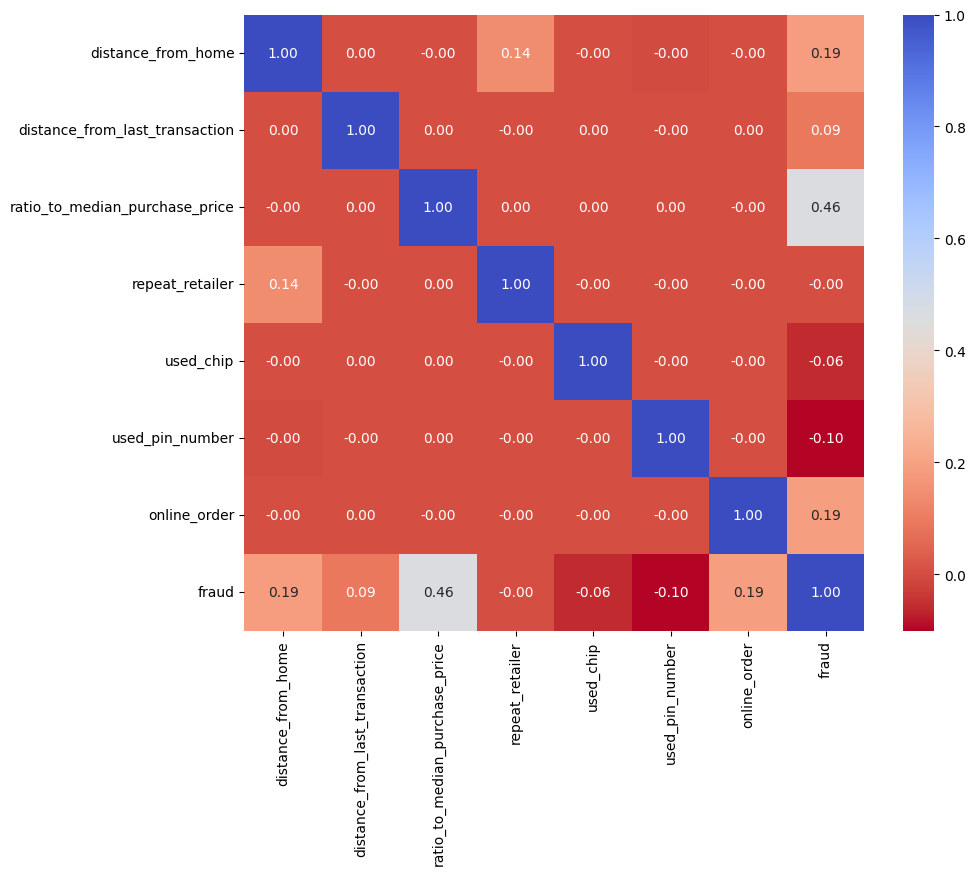

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(frauds.corr(), annot=True, fmt=".2f", cmap='coolwarm_r')
plt.show()

In [18]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

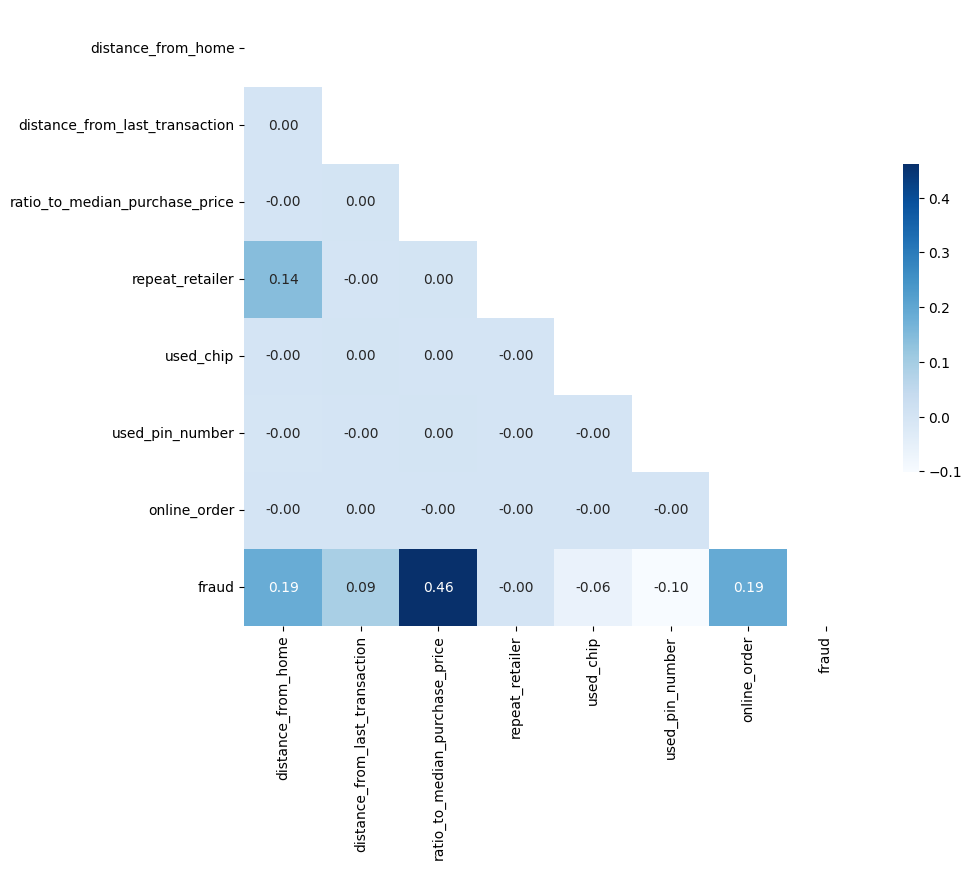

In [19]:
# Criando a máscara para a parte superior do triângulo

# Aqui, np.ones_like(corr, dtype=bool) cria uma matriz de booleanos com a mesma forma
# que a matriz de correlação corr. Todos os elementos dessa matriz são True. Em seguida,
# np.triu (triângulo superior) é aplicado para transformar a metade superior dessa matriz
# (incluindo a diagonal) em True, e o restante em False. Esta máscara será usada para ocultar
# a parte superior do heatmap.
mask = np.triu(np.ones_like(frauds.corr(), dtype=bool))

# Configurando o matplotlib figure
plt.figure(figsize=(10, 8))

# Desenhando o heatmap com a máscara

# sns.heatmap é usado para criar o heatmap.
# corr é a matriz de correlação que será visualizada.
# mask=mask aplica a máscara criada anteriormente, ocultando a parte superior do heatmap.
# annot=True habilita a anotação dos valores de correlação em cada célula do heatmap.
# fmt=".2f" formata estes valores numéricos para ter duas casas decimais.
# cmap='coolwarm' define a paleta de cores do heatmap, onde cores diferentes representam diferentes intensidades de correlação.
# cbar_kws={"shrink": .5} ajusta a barra de cores do heatmap (neste caso, reduzindo seu tamanho pela metade).
sns.heatmap(frauds.corr(), mask=mask, annot=True, fmt=".2f", cmap='Blues', cbar_kws={"shrink": .5})

# Mostrando o gráfico
plt.show()

GRÁFICOS

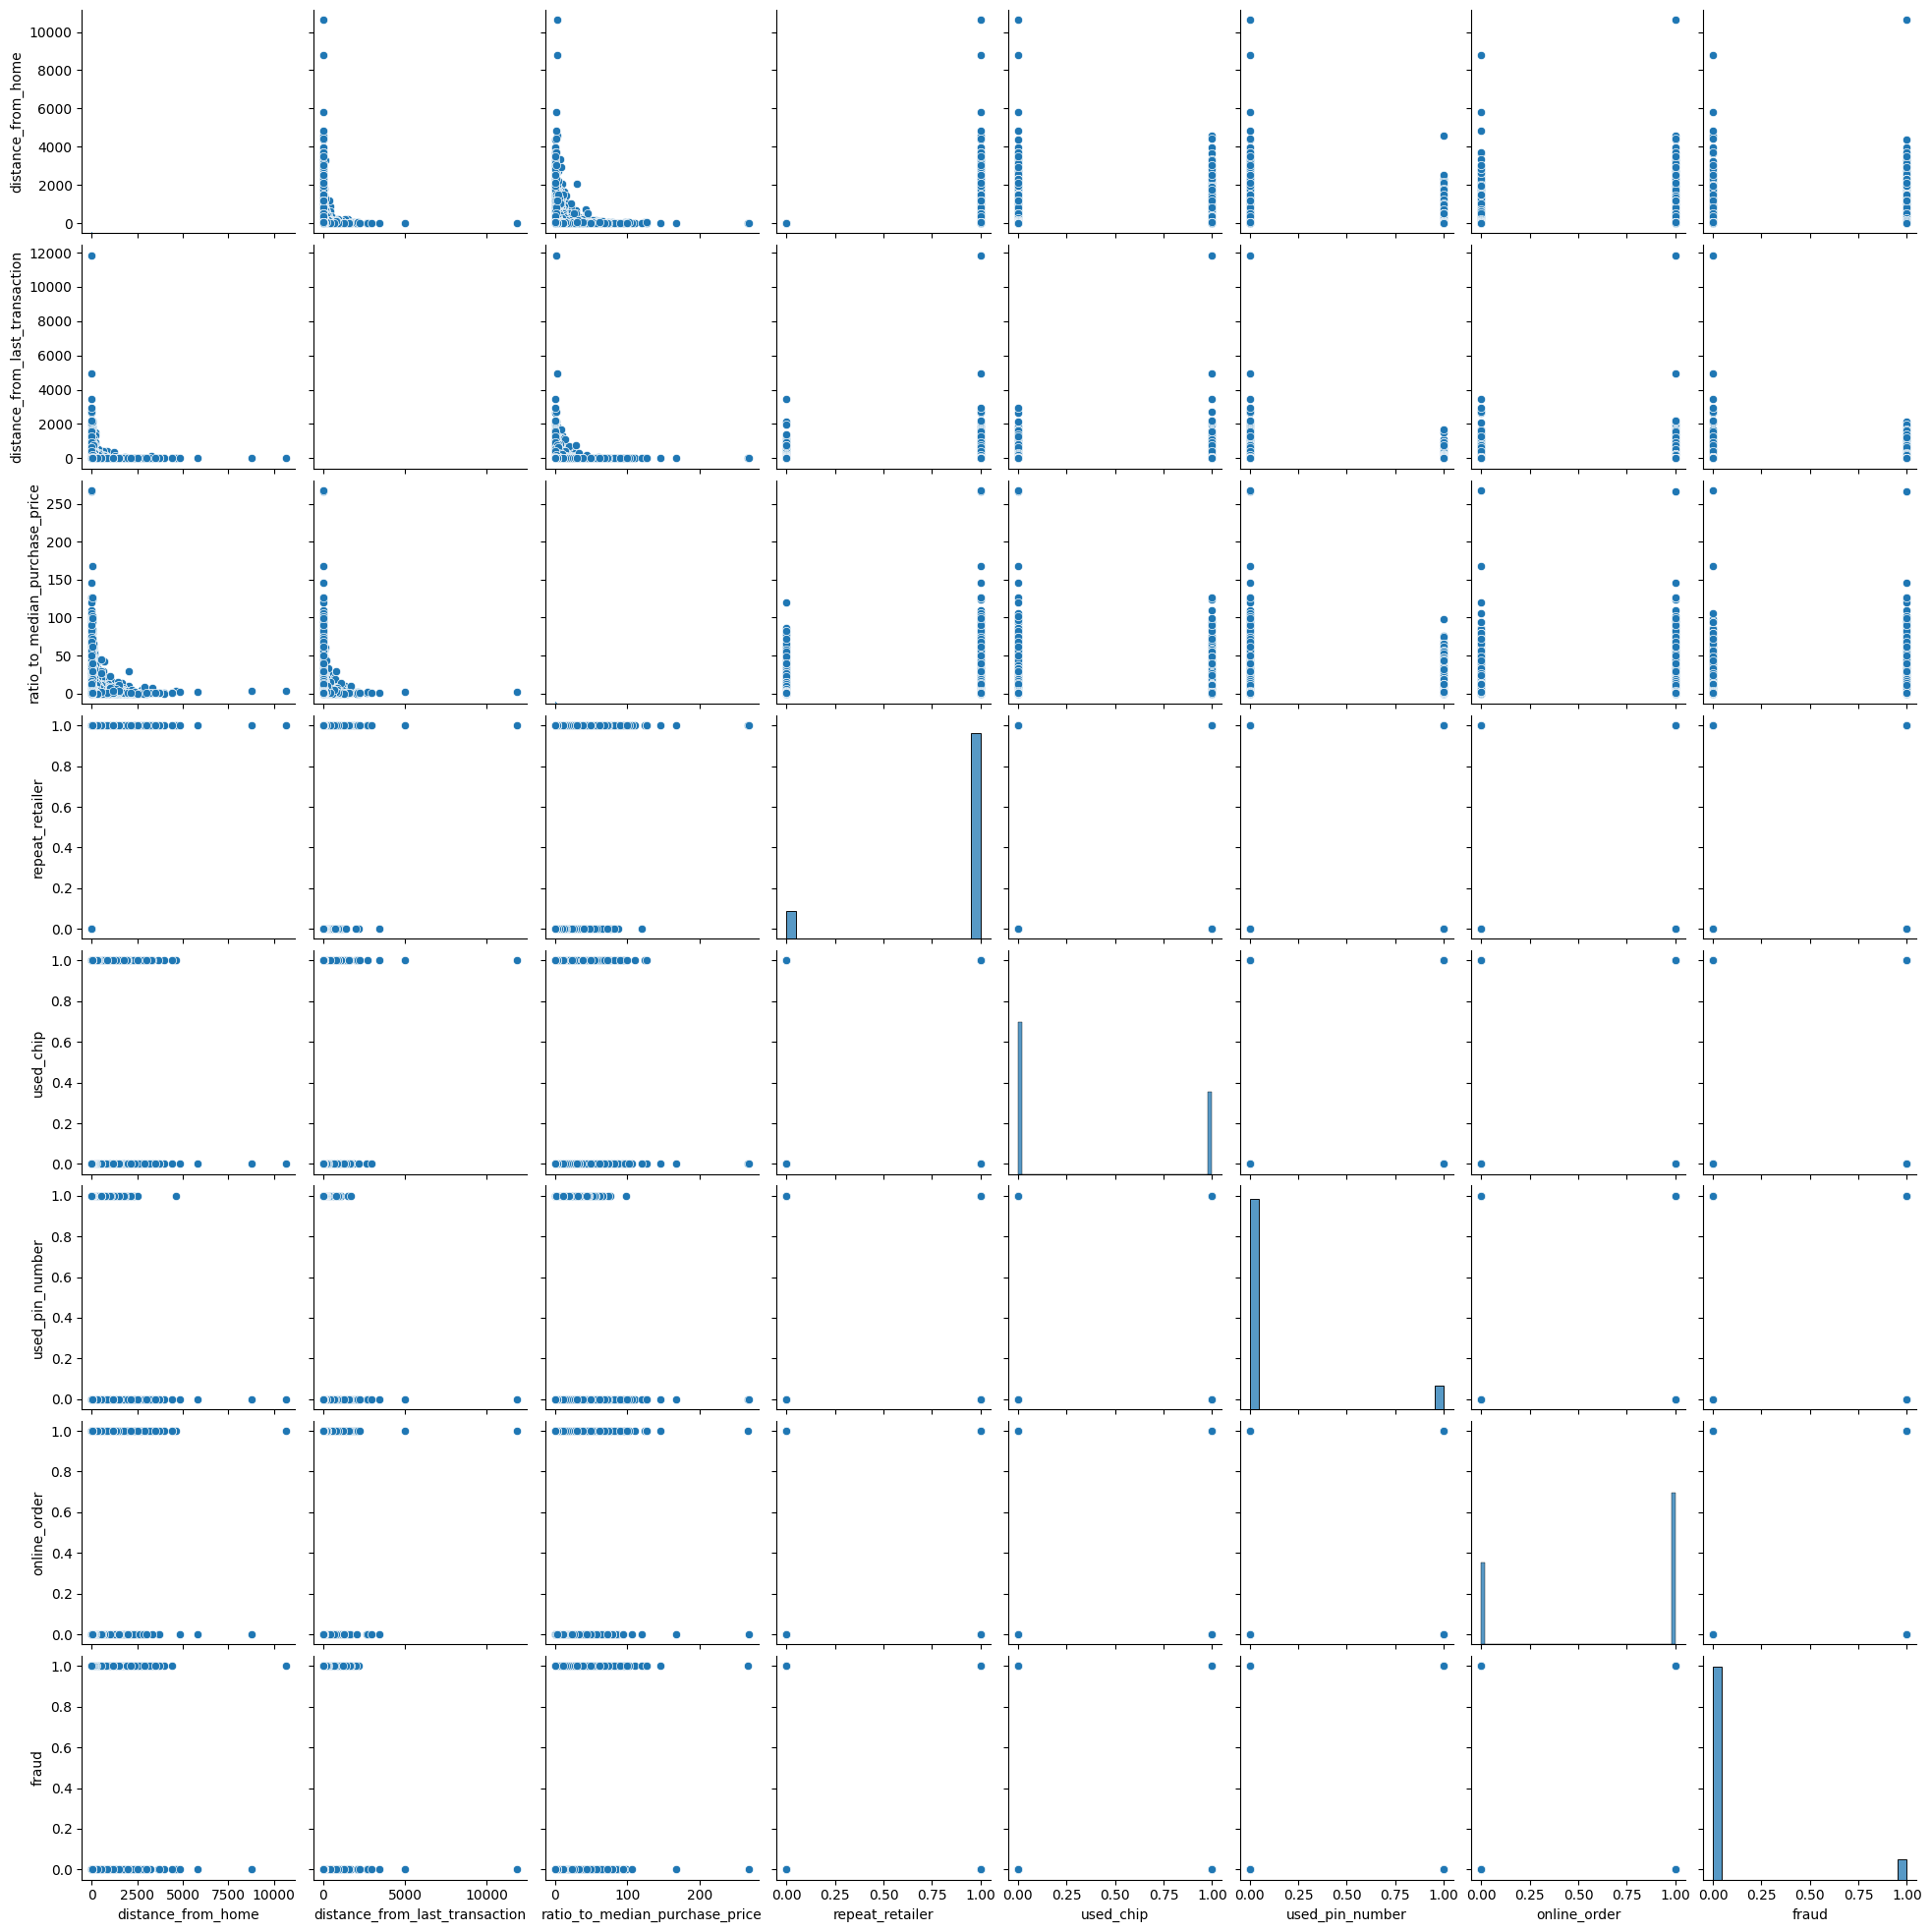

In [20]:
sns.pairplot(data=frauds)
plt.show()

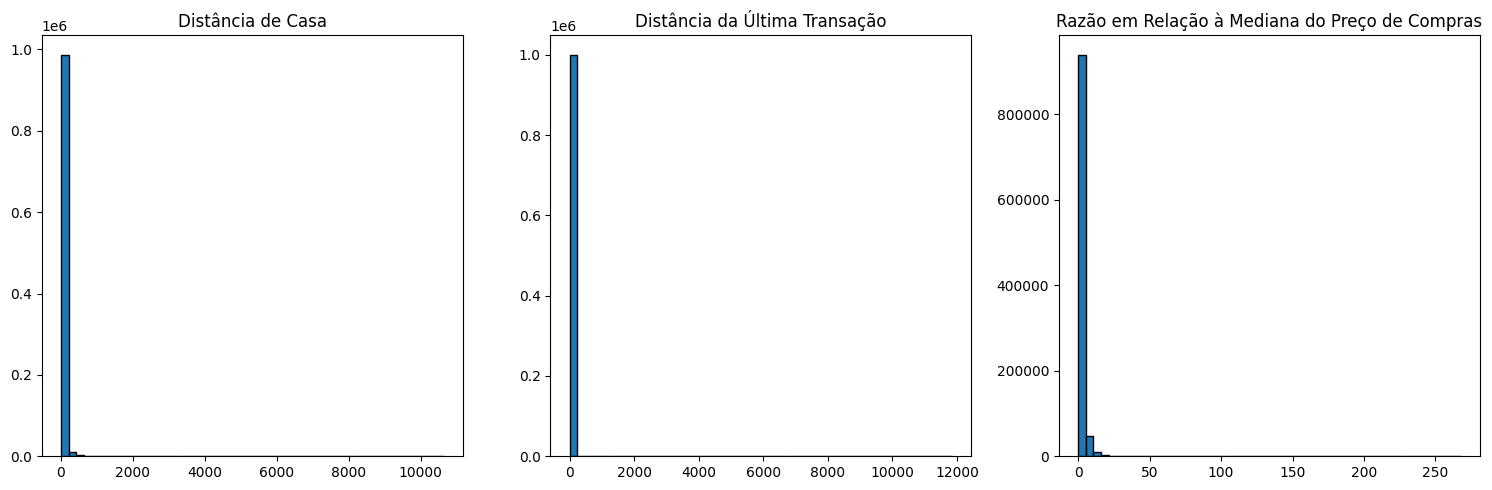

In [21]:
# Criando a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para a coluna1
axes[0].hist(frauds['distance_from_home'], bins=50, edgecolor='black')
axes[0].set_title('Distância de Casa')

# Histograma para a coluna2
axes[1].hist(frauds['distance_from_last_transaction'], bins=50, edgecolor='black')
axes[1].set_title('Distância da Última Transação')

# Histograma para a coluna3
axes[2].hist(frauds['ratio_to_median_purchase_price'], bins=50, edgecolor='black')
axes[2].set_title('Razão em Relação à Mediana do Preço de Compras')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

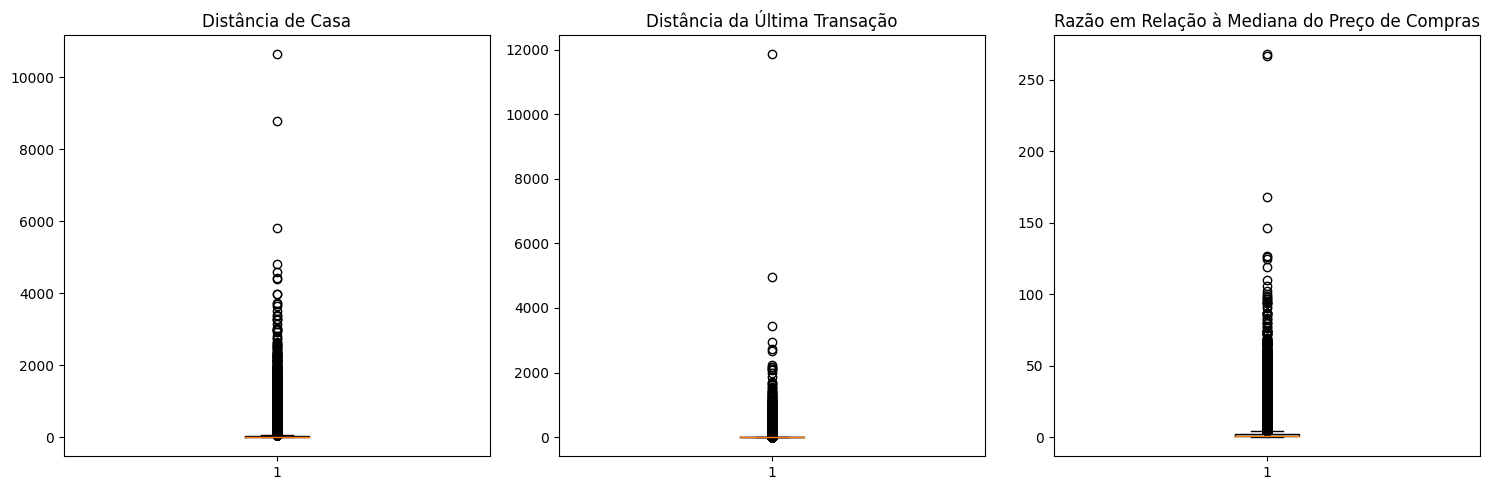

In [22]:
# Criando a figura e os eixos para 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para 'distance_from_home'
axes[0].boxplot(frauds['distance_from_home'])
axes[0].set_title('Distância de Casa')

# Boxplot para 'distance_from_last_transaction'
axes[1].boxplot(frauds['distance_from_last_transaction'])
axes[1].set_title('Distância da Última Transação')

# Boxplot para 'ratio_to_median_purchase_price'
axes[2].boxplot(frauds['ratio_to_median_purchase_price'])
axes[2].set_title('Razão em Relação à Mediana do Preço de Compras')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

In [23]:
quantis=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

print(frauds['distance_from_home'].quantile(quantis))

print(frauds['distance_from_last_transaction'].quantile(quantis))

print(frauds['ratio_to_median_purchase_price'].quantile(quantis))

0.1        1.654928
0.2        3.063293
0.3        4.780391
0.4        6.991721
0.5        9.967760
0.6       14.237892
0.7       20.840948
0.8       32.532760
0.9       60.268980
1.0    10632.723672
Name: distance_from_home, dtype: float64
0.1        0.099247
0.2        0.219628
0.3        0.388818
0.4        0.632540
0.5        0.998650
0.6        1.572747
0.7        2.567280
0.8        4.530126
0.9       10.008053
1.0    11851.104565
Name: distance_from_last_transaction, dtype: float64
0.1      0.244159
0.2      0.396155
0.3      0.561483
0.4      0.755881
0.5      0.997717
0.6      1.317781
0.7      1.778018
0.8      2.517179
0.9      4.080939
1.0    267.802942
Name: ratio_to_median_purchase_price, dtype: float64


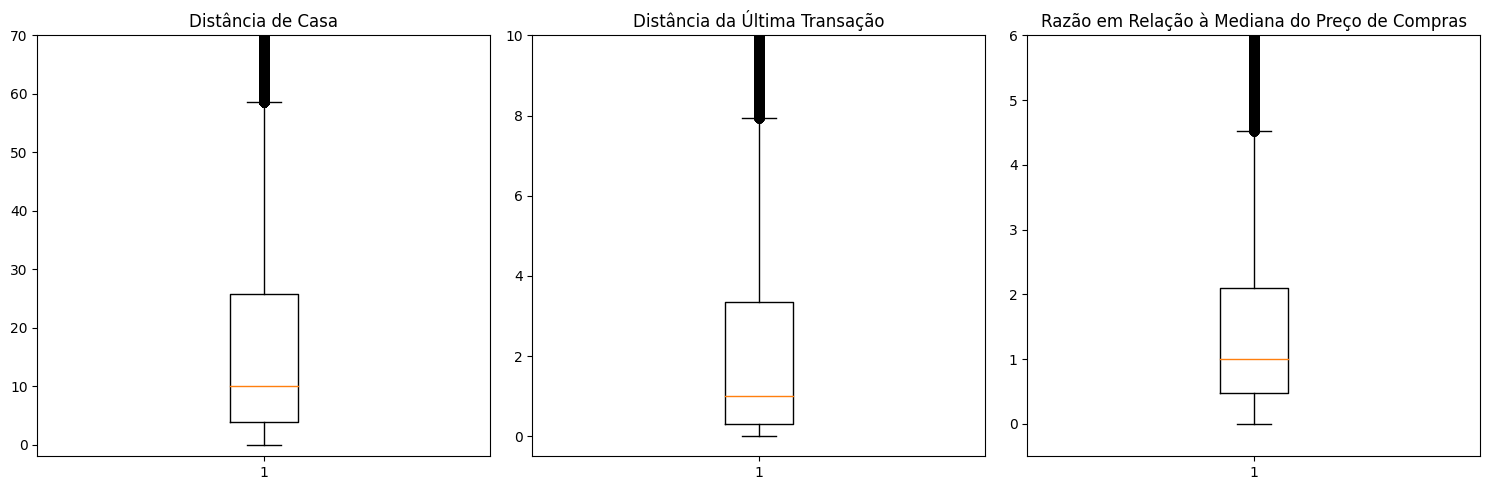

In [24]:
# Criando a figura e os eixos para 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para 'distance_from_home'
axes[0].boxplot(frauds['distance_from_home'])
axes[0].set_title('Distância de Casa')
axes[0].set_ylim([-2, 70])  # Limites de x para o primeiro histograma

# Boxplot para 'distance_from_last_transaction'
axes[1].boxplot(frauds['distance_from_last_transaction'])
axes[1].set_title('Distância da Última Transação')
axes[1].set_ylim([-0.5, 10])  # Limites de x para o segundo histograma

# Boxplot para 'ratio_to_median_purchase_price'
axes[2].boxplot(frauds['ratio_to_median_purchase_price'])
axes[2].set_title('Razão em Relação à Mediana do Preço de Compras')
axes[2].set_ylim([-0.5, 6])  # Limites de x para o terceiro histograma

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

In [25]:
def perct_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    n_outliers = serie[(serie < lim_inf) | (serie > lim_sup)].shape[0]
    porcentagem_outliers = (n_outliers / serie.shape[0]) * 100
    return porcentagem_outliers

# Aplicando a função a múltiplas colunas
for coluna in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
    perct = perct_outliers(frauds[coluna])
    print(f"Porcentagem de outliers em {coluna}: {perct}%")

Porcentagem de outliers em distance_from_home: 10.3631%
Porcentagem de outliers em distance_from_last_transaction: 12.4367%
Porcentagem de outliers em ratio_to_median_purchase_price: 8.438600000000001%


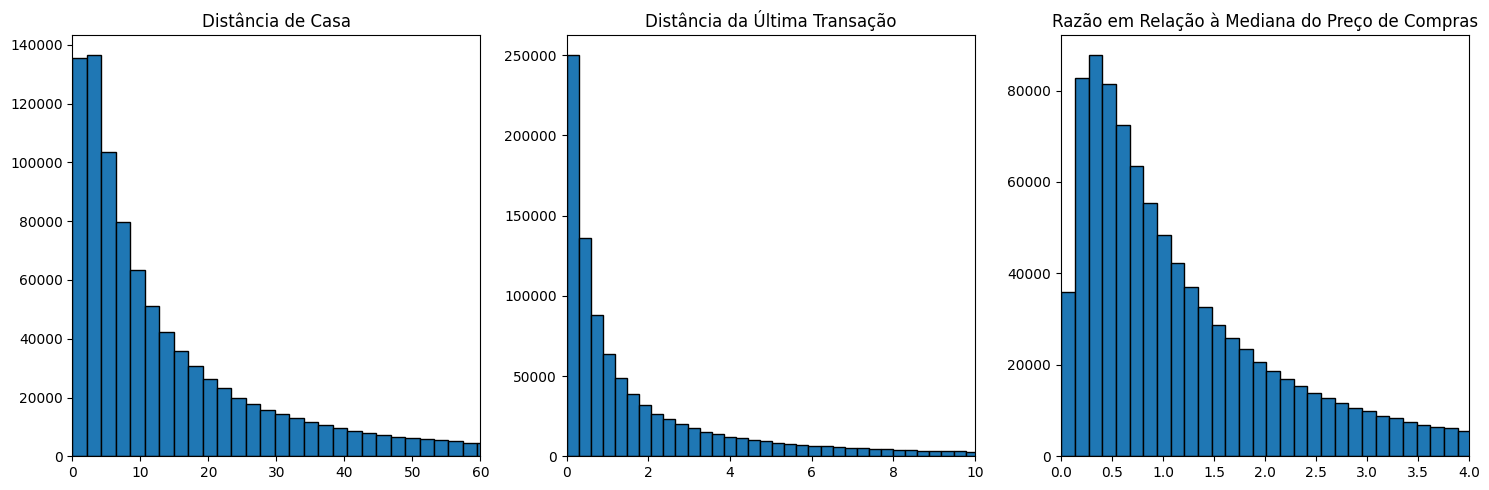

In [26]:
# Criando a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para a coluna1
axes[0].hist(frauds['distance_from_home'], bins=5000, edgecolor='black')
axes[0].set_title('Distância de Casa')
axes[0].set_xlim([0, 60])  # Limites de x para o primeiro histograma

# Histograma para a coluna2
axes[1].hist(frauds['distance_from_last_transaction'], bins=40000, edgecolor='black')
axes[1].set_title('Distância da Última Transação')
axes[1].set_xlim([0, 10])  # Limites de x para o segundo histograma

# Histograma para a coluna3
axes[2].hist(frauds['ratio_to_median_purchase_price'], bins=2000, edgecolor='black')
axes[2].set_title('Razão em Relação à Mediana do Preço de Compras')
axes[2].set_xlim([0, 4])  # Limites de x para o terceiro histograma

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\755977741.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\755977741.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\755977741.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,2].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\755977741.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\755977741.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(['NÃO', 'SIM'])


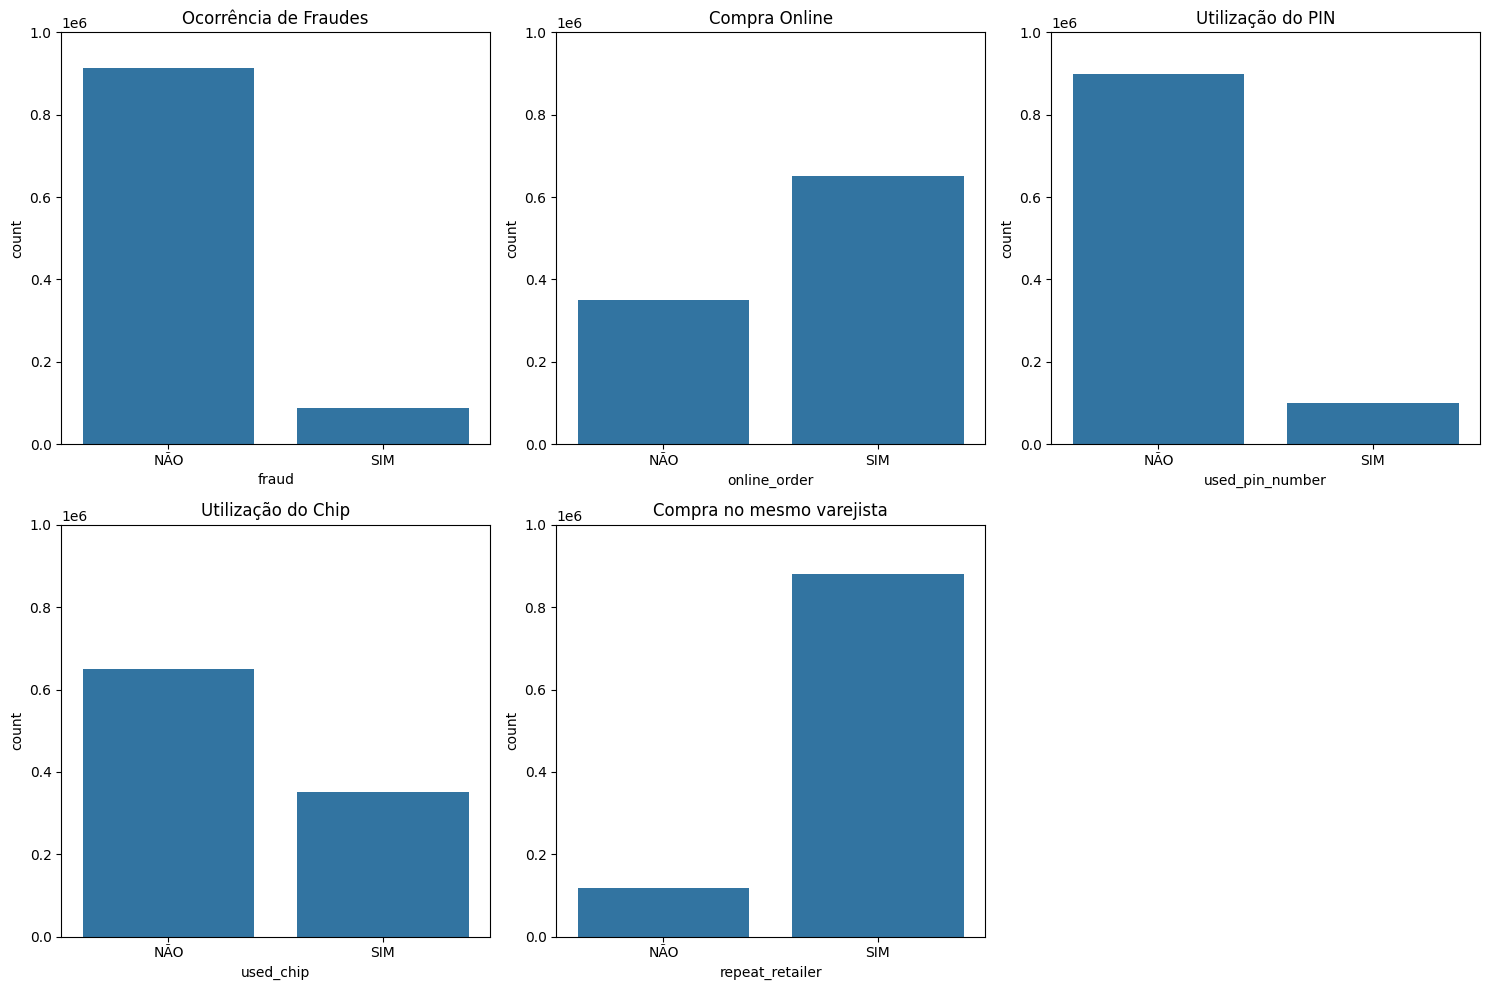

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plotando os gráficos de barras
sns.countplot(x='fraud', data=frauds, ax=axes[0, 0],)
axes[0,0].set_title('Ocorrência de Fraudes')
axes[0,0].set_xticklabels(['NÃO', 'SIM'])
axes[0,0].set_ylim(0,1000000)

sns.countplot(x='online_order', data=frauds, ax=axes[0, 1])
axes[0,1].set_title('Compra Online')
axes[0,1].set_xticklabels(['NÃO', 'SIM'])
axes[0,1].set_ylim(0,1000000)

sns.countplot(x='used_pin_number', data=frauds, ax=axes[0, 2])
axes[0,2].set_title('Utilização do PIN')
axes[0,2].set_xticklabels(['NÃO', 'SIM'])
axes[0,2].set_ylim(0,1000000)

sns.countplot(x='used_chip', data=frauds, ax=axes[1, 0])
axes[1,0].set_title('Utilização do Chip')
axes[1,0].set_xticklabels(['NÃO', 'SIM'])
axes[1,0].set_ylim(0,1000000)

sns.countplot(x='repeat_retailer', data=frauds, ax=axes[1, 1])
axes[1,1].set_title('Compra no mesmo varejista')
axes[1,1].set_xticklabels(['NÃO', 'SIM'])
axes[1,1].set_ylim(0,1000000)

# Ocultar o sexto subplot vazio (já que temos apenas 5 gráficos)
axes[1, 2].set_visible(False)

# Ajuste final do layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1504578788.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1504578788.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1504578788.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1504578788.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(['NÃO', 'SIM'])


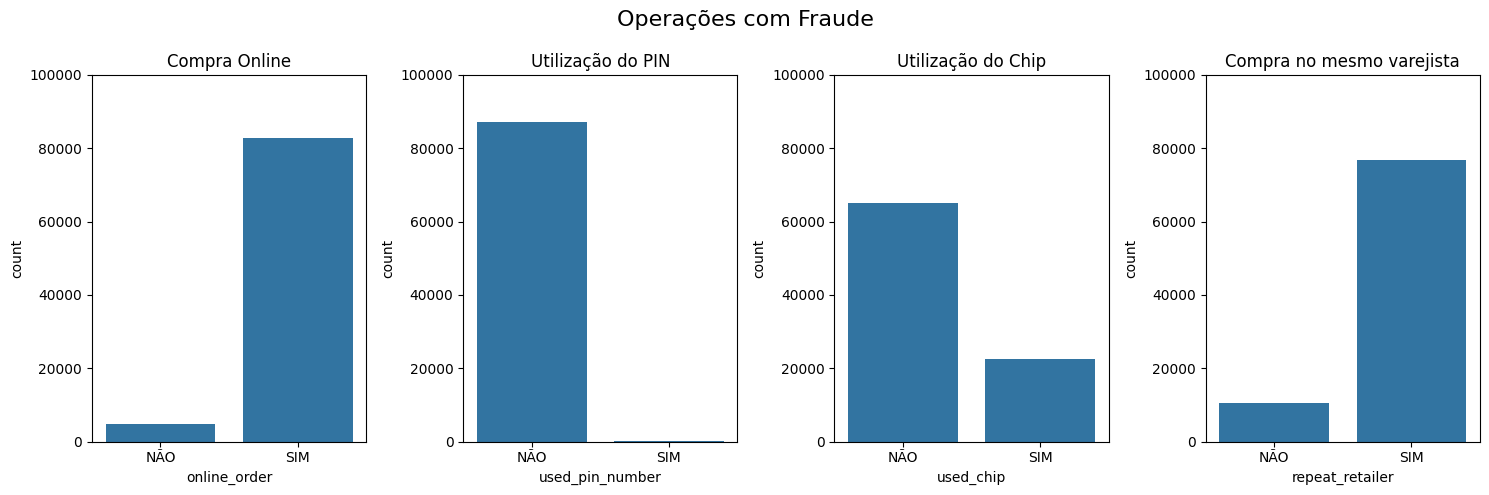

In [28]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Operações com Fraude', fontsize=16)

# Plotando os gráficos de barras
sns.countplot(x='online_order', data=frauds[frauds['fraud']==1], ax=axes[0])
axes[0].set_title('Compra Online')
axes[0].set_xticklabels(['NÃO', 'SIM'])
axes[0].set_ylim(0,100000)

sns.countplot(x='used_pin_number', data=frauds[frauds['fraud']==1], ax=axes[1])
axes[1].set_title('Utilização do PIN')
axes[1].set_xticklabels(['NÃO', 'SIM'])
axes[1].set_ylim(0,100000)

sns.countplot(x='used_chip', data=frauds[frauds['fraud']==1], ax=axes[2])
axes[2].set_title('Utilização do Chip')
axes[2].set_xticklabels(['NÃO', 'SIM'])
axes[2].set_ylim(0,100000)

sns.countplot(x='repeat_retailer', data=frauds[frauds['fraud']==1], ax=axes[3])
axes[3].set_title('Compra no mesmo varejista')
axes[3].set_xticklabels(['NÃO', 'SIM'])
axes[3].set_ylim(0,100000)

# Ajuste final do layout
plt.tight_layout()

# Ajuste adicional para evitar sobreposição do título geral com os subplots
plt.subplots_adjust(top=0.85)

# Mostrando o gráfico
plt.show()

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\924082648.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\924082648.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\924082648.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\924082648.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(['NÃO', 'SIM'])


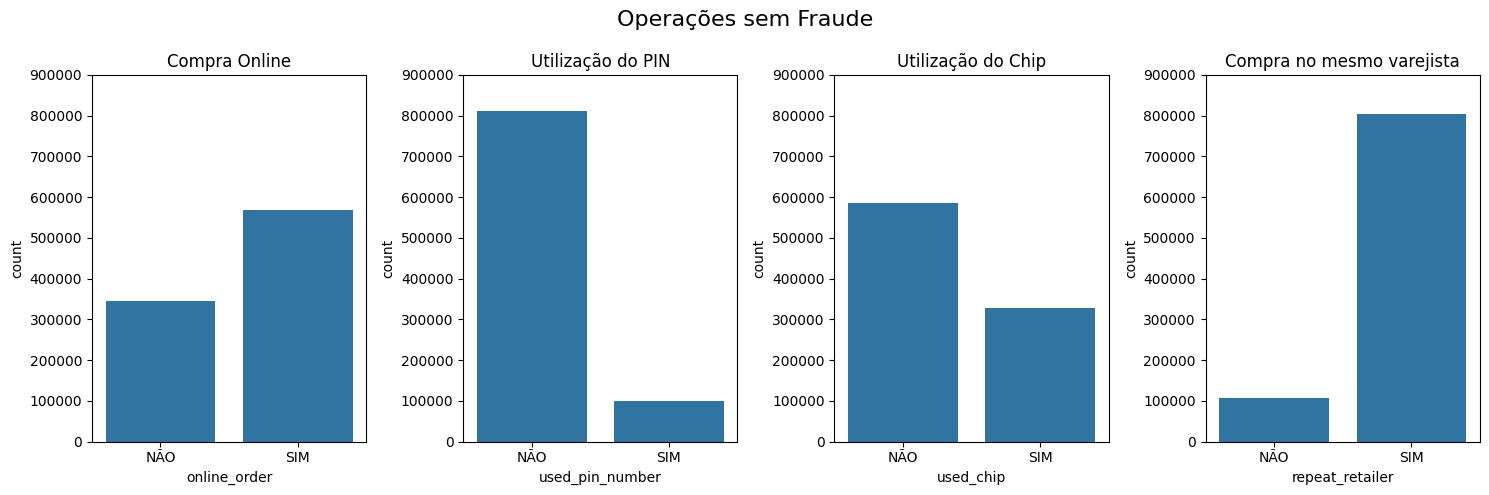

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Operações sem Fraude', fontsize=16)

# Plotando os gráficos de barras
sns.countplot(x='online_order', data=frauds[frauds['fraud']==0], ax=axes[0])
axes[0].set_title('Compra Online')
axes[0].set_xticklabels(['NÃO', 'SIM'])
axes[0].set_ylim(0,900000)

sns.countplot(x='used_pin_number', data=frauds[frauds['fraud']==0], ax=axes[1])
axes[1].set_title('Utilização do PIN')
axes[1].set_xticklabels(['NÃO', 'SIM'])
axes[1].set_ylim(0,900000)

sns.countplot(x='used_chip', data=frauds[frauds['fraud']==0], ax=axes[2])
axes[2].set_title('Utilização do Chip')
axes[2].set_xticklabels(['NÃO', 'SIM'])
axes[2].set_ylim(0,900000)

sns.countplot(x='repeat_retailer', data=frauds[frauds['fraud']==0], ax=axes[3])
axes[3].set_title('Compra no mesmo varejista')
axes[3].set_xticklabels(['NÃO', 'SIM'])
axes[3].set_ylim(0,900000)

# Ajuste final do layout
plt.tight_layout()

# Ajuste adicional para evitar sobreposição do título geral com os subplots
plt.subplots_adjust(top=0.85)

# Mostrando o gráfico
plt.show()

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1735939113.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1735939113.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1735939113.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['NÃO', 'SIM'])
C:\Users\CARLOS\AppData\Local\Temp\ipykernel_24472\1735939113.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(['NÃO', 'SIM'])


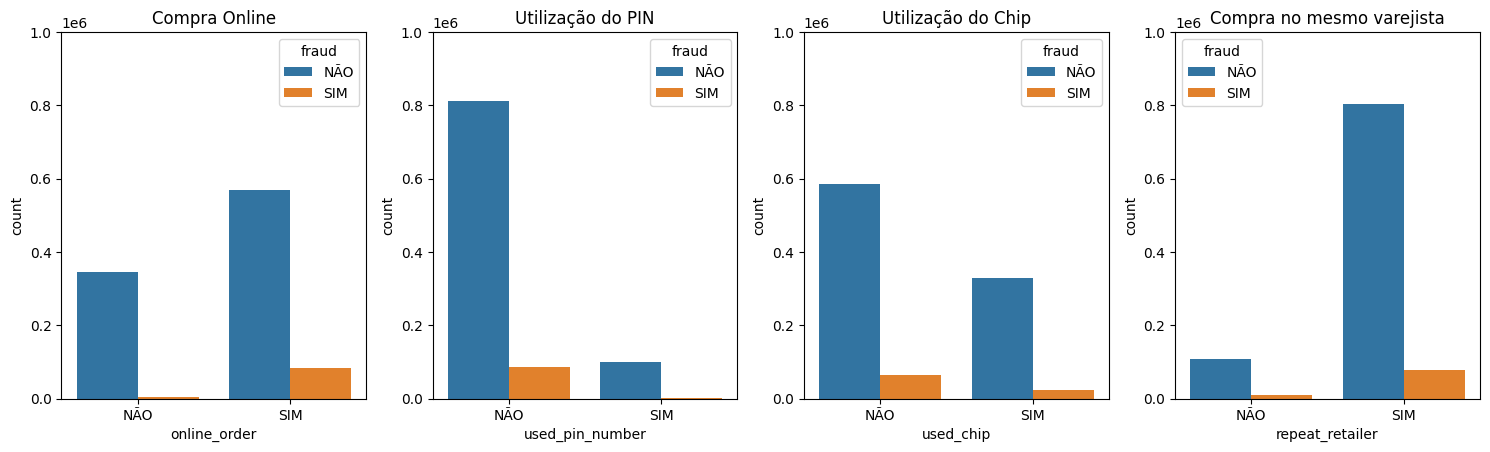

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

legend_labels = {0: 'NÃO', 1: 'SIM'}
# Função para mapear a legenda
def map_legend_labels(series):
    return series.map(legend_labels)

# Plotando os gráficos de barras empilhadas
sns.countplot(data=frauds, x='online_order', hue=map_legend_labels(frauds['fraud']), ax=axes[0])
axes[0].set_title('Compra Online')
axes[0].set_ylim(0, 1000000)
axes[0].set_xticklabels(['NÃO', 'SIM'])

sns.countplot(data=frauds, x='used_pin_number', hue=map_legend_labels(frauds['fraud']), ax=axes[1])
axes[1].set_title('Utilização do PIN')
axes[1].set_ylim(0, 1000000)
axes[1].set_xticklabels(['NÃO', 'SIM'])

sns.countplot(data=frauds, x='used_chip', hue=map_legend_labels(frauds['fraud']), ax=axes[2])
axes[2].set_title('Utilização do Chip')
axes[2].set_ylim(0, 1000000)
axes[2].set_xticklabels(['NÃO', 'SIM'])

sns.countplot(data=frauds, x='repeat_retailer', hue=map_legend_labels(frauds['fraud']), ax=axes[3])
axes[3].set_title('Compra no mesmo varejista')
axes[3].set_ylim(0, 1000000)
axes[3].set_xticklabels(['NÃO', 'SIM'])

# Ajuste final do layout
plt.tight_layout()

# Ajuste adicional para evitar sobreposição do título geral com os subplots
plt.subplots_adjust(top=0.85)

# Mostrando o gráfico
plt.show()

GRÁFICOS ADICIONAIS COM SEABORN

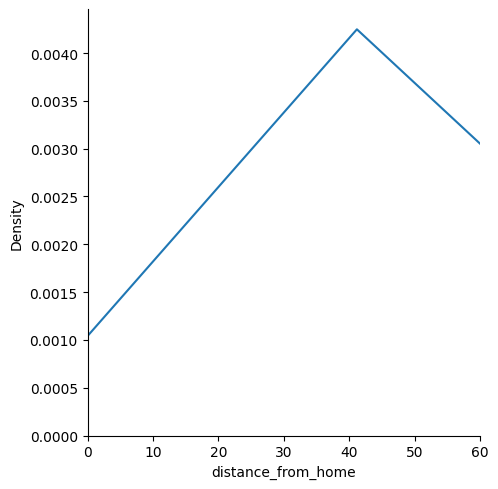

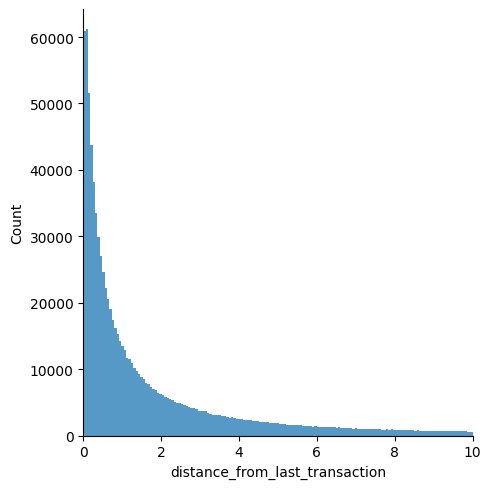

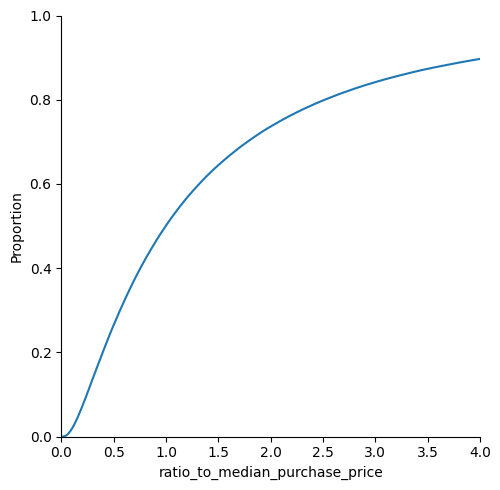

In [31]:
sns.displot(frauds['distance_from_home'],kind='kde')
plt.xlim(0,60)
plt.show()

sns.displot(frauds['distance_from_last_transaction'],kind='hist')
plt.xlim(0,10)
plt.show()

sns.displot(frauds['ratio_to_median_purchase_price'],kind='ecdf')
plt.xlim(0,4)
plt.show()

In [32]:
#CODIGO LEVA MUITO TEMPO PARA EXECUTAR

#sns.barplot(data=frauds,x='distance_from_home',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='distance_from_last_transaction',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='ratio_to_median_purchase_price',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='repeat_retailer',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='used_chip',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='used_pin_number',y='fraud')
#plt.show()

#sns.barplot(data=frauds,x='online_order',y='fraud')
#plt.show()

COMPARAÇÃO ENTRE GRUPOS

In [33]:
print('---------------------------------------------------')
print('Distância média de casa quando HÁ fraude')
print(frauds[frauds['fraud']==1]['distance_from_home'].mean())
print('Distância média de casa quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['distance_from_home'].mean())
print('---------------------------------------------------')

print('Distância média da última transação quando HÁ fraude')
print(frauds[frauds['fraud']==1]['distance_from_last_transaction'].mean())
print('Distância média da última transação quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['distance_from_last_transaction'].mean())
print('---------------------------------------------------')

print('Razão em Relação à Mediana do Preço de Compras quando HÁ fraude')
print(frauds[frauds['fraud']==1]['ratio_to_median_purchase_price'].mean())
print('Razão em Relação à Mediana do Preço de Compras quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['ratio_to_median_purchase_price'].mean())
print('---------------------------------------------------')

print('Proporção de compras em um varejista já conhecido quando HÁ fraude')
print(frauds[frauds['fraud']==1]['repeat_retailer'].mean())
print('Proporção de compras em um varejista já conhecido quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['repeat_retailer'].mean())
print('---------------------------------------------------')

print('Proporção da utilização do chip quando HÁ fraude')
print(frauds[frauds['fraud']==1]['used_chip'].mean())
print('Proporção da utilização do chip quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['used_chip'].mean())
print('---------------------------------------------------')

print('Proporção da utilização do PIN quando HÁ fraude')
print(frauds[frauds['fraud']==1]['used_pin_number'].mean())
print('Proporção da utilização do PIN quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['used_pin_number'].mean())
print('---------------------------------------------------')

print('Proporção das transações online quando HÁ fraude')
print(frauds[frauds['fraud']==1]['online_order'].mean())
print('Proporção das transações online quando NÃO HÁ fraude')
print(frauds[frauds['fraud']==0]['online_order'].mean())
print('---------------------------------------------------')

---------------------------------------------------
Distância média de casa quando HÁ fraude
66.26187633436918
Distância média de casa quando NÃO HÁ fraude
22.832976018240714
---------------------------------------------------
Distância média da última transação quando HÁ fraude
12.71218512966691
Distância média da última transação quando NÃO HÁ fraude
4.3013907354213785
---------------------------------------------------
Razão em Relação à Mediana do Preço de Compras quando HÁ fraude
6.006323490486969
Razão em Relação à Mediana do Preço de Compras quando NÃO HÁ fraude
1.423641855458059
---------------------------------------------------
Proporção de compras em um varejista já conhecido quando HÁ fraude
0.880118531400524
Proporção de compras em um varejista já conhecido quando NÃO HÁ fraude
0.8816717565365654
---------------------------------------------------
Proporção da utilização do chip quando HÁ fraude
0.25639852178986994
Proporção da utilização do chip quando NÃO HÁ fraude
0.359

In [34]:
frauds.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [35]:
frauds.groupby('fraud').mean().T

fraud,0.0,1.0
distance_from_home,22.832976,66.261876
distance_from_last_transaction,4.301391,12.712185
ratio_to_median_purchase_price,1.423642,6.006323
repeat_retailer,0.881672,0.880119
used_chip,0.359402,0.256399
used_pin_number,0.109944,0.003123
online_order,0.622225,0.946318
